# Data Analysis Interview Challenge

### Import libs & data

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_json('logins.json')
df.shape  #(93142, 1)
df.head()  #    0 - 1970-01-01 20:13:18   ---     93141 - 1970-04-13 18:54:23

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [14]:
df.columns    #  Index(['login_time'], dtype='object')
df.index    # RangeIndex(start=0, stop=93142, step=1)
df.iloc[0:3]

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [15]:
df.describe(datetime_is_numeric= True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


# Part 1 ‐ Exploratory data analysis

In [17]:
df = pd.read_json('logins.json')
df.head(10)  # df is unsorted
df = df.sort_values(by='login_time')  # sort login_time
df['Freq'] = 1   # add colum Freq initialized at 1
df.head(7)

,login_time,Freq
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1
5,1970-01-01 20:21:41,1
10,1970-01-01 20:26:05,1


In [18]:
type(df.index )
df.columns
# print(df['login_time'].dtypes)  # datetime64[ns]
df.dtypes
# type(df) #DataFrame

login_time    datetime64[ns]
Freq                   int64
dtype: object

In [19]:
df_15m = df.copy()
df_15m = df_15m.set_index('login_time')
df_15m['Freq'] = 1
df_15m = df_15m.resample('15T').sum()


In [20]:
df_15m.head()
# df_15m.columns

,Freq
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


We can find out what day and time had highest Logins Frequency 

In [ ]:
print('Highest logins are: ', df_15m['Freq'].max())  # most logins Frequency per 15 min was 73 per 15 min
lt = df_15m[df_15m['Freq'] > 60 ]
lt.head()  # highest  above 60 logins 15 min periods
lt.reset_index(inplace=True)

def convert_ts(x):  
    ''' Infer weekday from timestamp'''
    stamp = pd.Timestamp(x)
    return stamp.day_name(), stamp.day_of_week

lt['WeekDay'] = lt.apply(lambda x: convert_ts( x['login_time']), axis = 1)



- Most logins Frequency per 15 min was 73 per 15 min

In [22]:
lt.head()

,login_time,Freq,WeekDay
0,1970-03-01 04:30:00,73,"(Sunday, 6)"
1,1970-04-04 01:15:00,63,"(Saturday, 5)"
2,1970-04-04 01:30:00,64,"(Saturday, 5)"
3,1970-04-04 05:30:00,66,"(Saturday, 5)"


Conclusion: Weekend days (Saturdays and Sunday) represent days with most frequent logins. 

In [24]:
df_15m.shape   #(9788,)
df_15m.head(20)
df_15m.to_csv('LogedTimeIn15.csv')

### Visualizations
#### 1 week of Activity

<AxesSubplot: xlabel='login_time'>

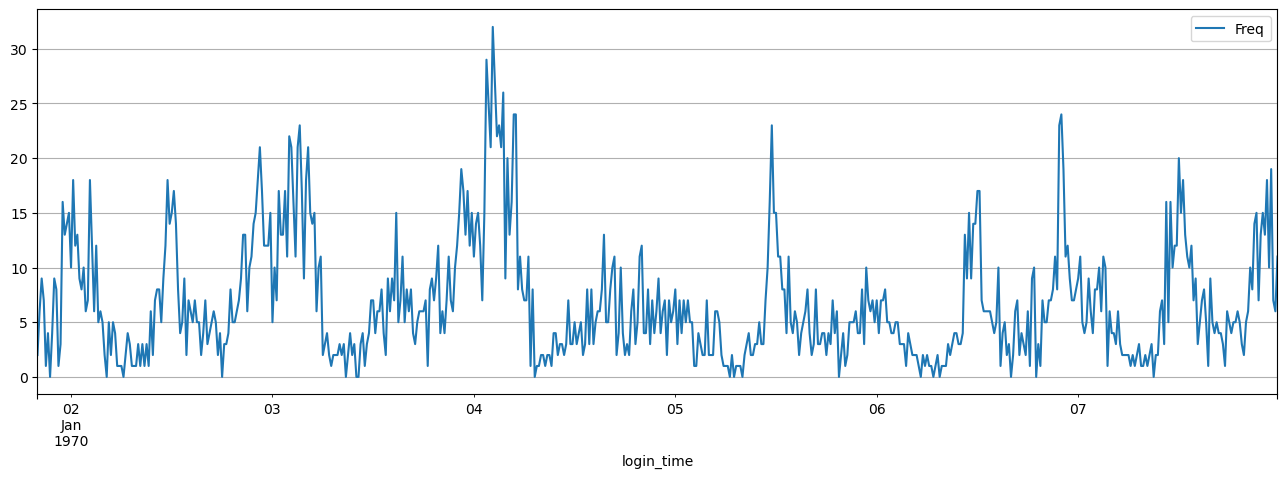

In [25]:
df_15m['1970-01-01':'1970-01-07'].plot(grid=True, figsize=(16,5))

In [74]:
df_15m.head()

,Freq,login_time,Hour
login_time,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,20
1970-01-01 20:15:00,6,1970-01-01 20:15:00,20
1970-01-01 20:30:00,9,1970-01-01 20:30:00,20
1970-01-01 20:45:00,7,1970-01-01 20:45:00,20
1970-01-01 21:00:00,1,1970-01-01 21:00:00,21


In [75]:
df_15m['login_time'] = df_15m.index
df_15m['Hour'] = df_15m['login_time'].dt.hour
diff_hour1 = df_15m[['Freq', 'Hour']]


In [102]:
df_grouped = df_15m.groupby(pd.Grouper(freq='60Min')).agg({'Freq': 'sum', 'Hour': 'mean'})  # group and sum Freq by 1 hr


In [103]:
df_grouped.shape   # (2447, 2)
df_grouped.head()

,Freq,Hour
login_time,,
1970-01-01 20:00:00,24,20.0
1970-01-01 21:00:00,9,21.0
1970-01-01 22:00:00,21,22.0
1970-01-01 23:00:00,58,23.0
1970-01-02 00:00:00,53,0.0


In [108]:
s = df_grouped.Freq.sort_values()# checking if properly sorted and max values are correct
s

login_time
1970-02-19 08:00:00      0
1970-01-08 15:00:00      0
1970-03-03 06:00:00      1
1970-04-07 06:00:00      1
1970-02-21 08:00:00      1
                      ... 
1970-04-04 00:00:00    173
1970-04-04 04:00:00    174
1970-03-01 04:00:00    205
1970-04-04 05:00:00    226
1970-04-04 01:00:00    237
Name: Freq, Length: 2447, dtype: int64

In [104]:
df_grouped.Freq.max()  #   237 logins was the highest per hour

237

- 237 was the highest Frequency logins per hour and April had highest per hour Freqency logins

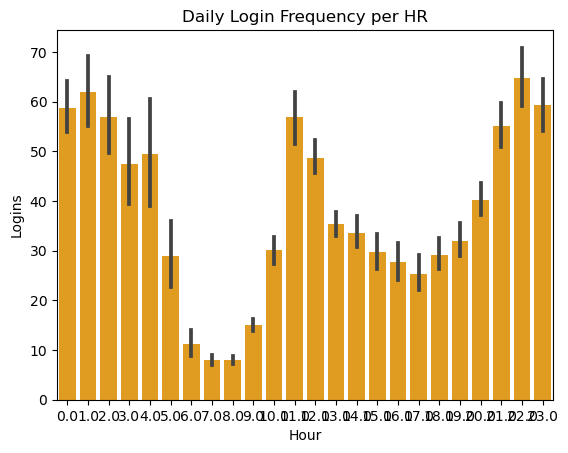

In [109]:
sns.barplot(x= 'Hour', y= 'Freq', data= df_grouped, color= 'orange')
plt.xlabel('Hour')
plt.title('Daily Login Frequency per HR')
plt.ylabel('Logins')
plt.show()

- We can observe that Frequency was at Night Hours starting 21 hr  to 4 after midnight. Lowest were during 5 am to 11 am. Then another pick around noon (12-1 pm) and another lowering between 4 pm-9pm). 

In [110]:
df_15m['hour'] = df_15m['login_time'].dt.hour
diff_hour = df_15m[['Freq', 'hour']]
diff_hour = df_15m.groupby('hour').sum().reset_index()
diff_hour.sort_values(by='Freq', ascending= False)

,hour,Freq,Hour
22,22,6607,8976
1,1,6317,408
23,23,6058,9384
0,0,5993,0
2,2,5800,816
11,11,5799,4488
21,21,5623,8568
4,4,5034,1632
12,12,4964,4896
3,3,4831,1224


In [114]:
diff_hour.shape  # (24, 3)
diff_hour.head(24)

,hour,Freq,Hour
0,0,5993,0
1,1,6317,408
2,2,5800,816
3,3,4831,1224
4,4,5034,1632
5,5,2945,2040
6,6,1138,2448
7,7,815,2856
8,8,818,3264
9,9,1527,3672


In [111]:
diff_hour1.head()

,Freq,Hour
login_time,,
1970-01-01 20:00:00,2,20
1970-01-01 20:15:00,6,20
1970-01-01 20:30:00,9,20
1970-01-01 20:45:00,7,20
1970-01-01 21:00:00,1,21


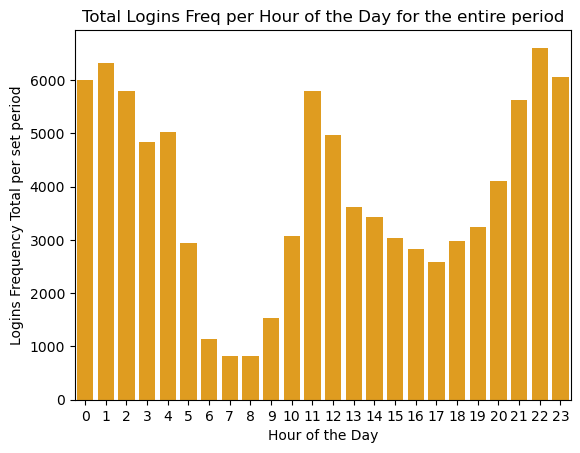

In [118]:
sns.barplot(x= 'hour', y='Freq', data= diff_hour, color='Orange')
plt.xlabel('Hour of the Day')
plt.title('Total Logins Freq per Hour of the Day for the entire period')
plt.ylabel('Logins Frequency Total per set period')
plt.show()

- Alternative vizualization Usage shows again as the most intensive between the hours of 21-5 and 11-12. It drops in the hours between 5-10 and 13-20.


##### resample to 1 day

In [119]:
d = pd.read_json('logins.json')
d.head(10)  # df is unsorted
# d = d.sort_values(by='login_time')  # sort login_time
d.head(7)
d.shape  # (93142, 1)
d = d.set_index('login_time').sort_index().resample('1d').size()  #  set index as login_time, resample to 1 day
print('Shape is ', d.shape) # Shape is  (103,)
d.head(2)

Shape is  (103,)


login_time
1970-01-01    112
1970-01-02    681
Freq: D, dtype: int64

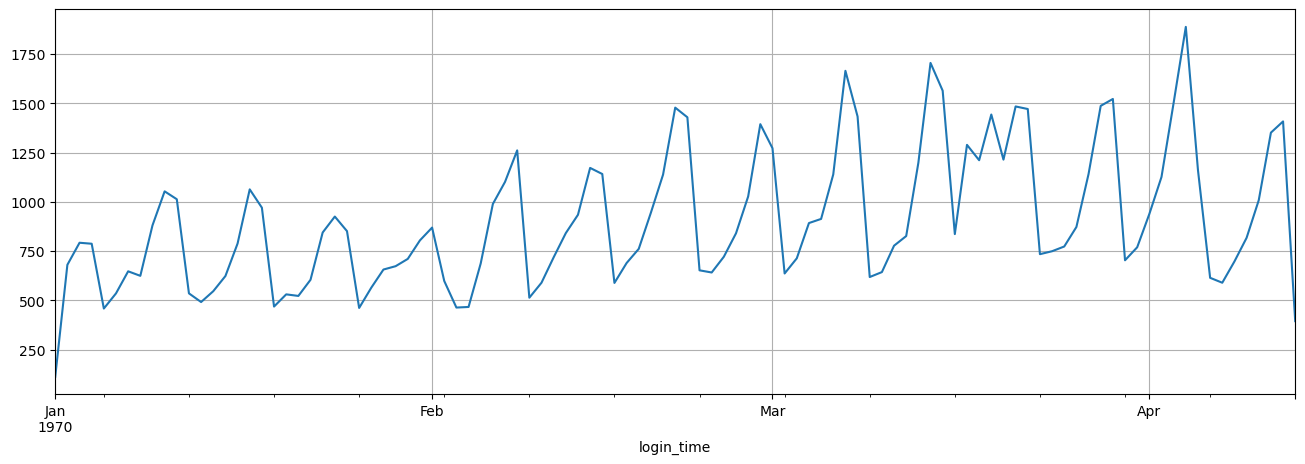

In [120]:
d.plot(grid=True, figsize=(16,5)) # plot for each day
plt.show()

Conclusion: We infer that each Day has spike and drop of uneven cyclical nature, with a gradual average increase from Jan onward. Inconclusive for Apr, because of only 2 weeks of available data.

In [60]:
d.head()

login_time
1970-01-01    112
1970-01-02    681
1970-01-03    793
1970-01-04    788
1970-01-05    459
Freq: D, dtype: int64

- Let's check 7 days usage?

Shape is  (15,)


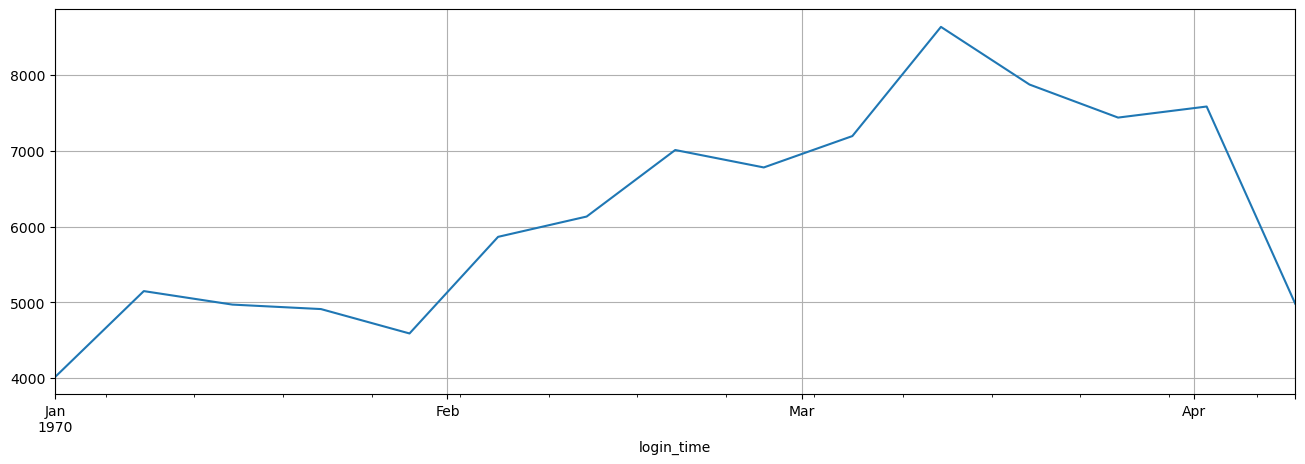

In [121]:
w = pd.read_json('logins.json')
w.head(10)  # df is unsorted
# w = w.sort_values(by='login_time')  # sort login_time
w.head(7)
w.shape  # (93142, 1)
w = w.set_index('login_time').sort_index().resample('7d').size()  #  set index as login_time, resample to 7 days
print('Shape is ', w.shape) # Shape is  (15,)
w.tail(10)
w.plot(grid=True, figsize=(16,5))
plt.show()

###  Conclusions:
- February had bigger activity then Jan, while March was even busier then Feb. 
- April is the highest and lowest activity (greatest spike and drop) (but inconclusive because it's based on incomplete halfmonth data)
- Each Day has spike and drop of uneven cyclical nature, with a gradual average increase from Jan onward.

### Exploring Log_time file of 15 min intervals

In [122]:
l = pd.read_csv('LogedTimeIn15.csv')
l.shape    # (9788, 2)
l = l.set_index('login_time')
l.head()
# l.shape    # (9788, 1)

,Freq
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0, 0.5, 'Frequency')

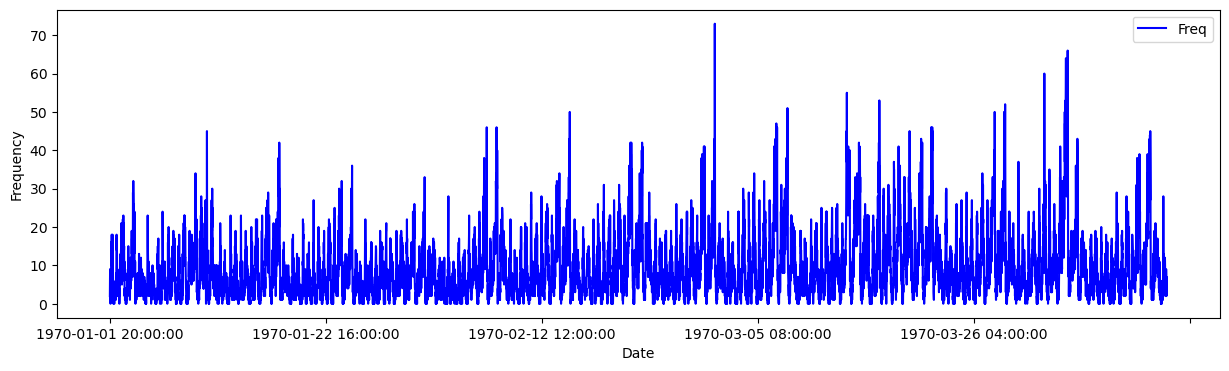

In [123]:
ax = l.plot(color='blue', figsize=(15,4))
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')

- 1 Week sample look shows cyclical daily nature of the frequency usage.

<AxesSubplot: xlabel='login_time'>

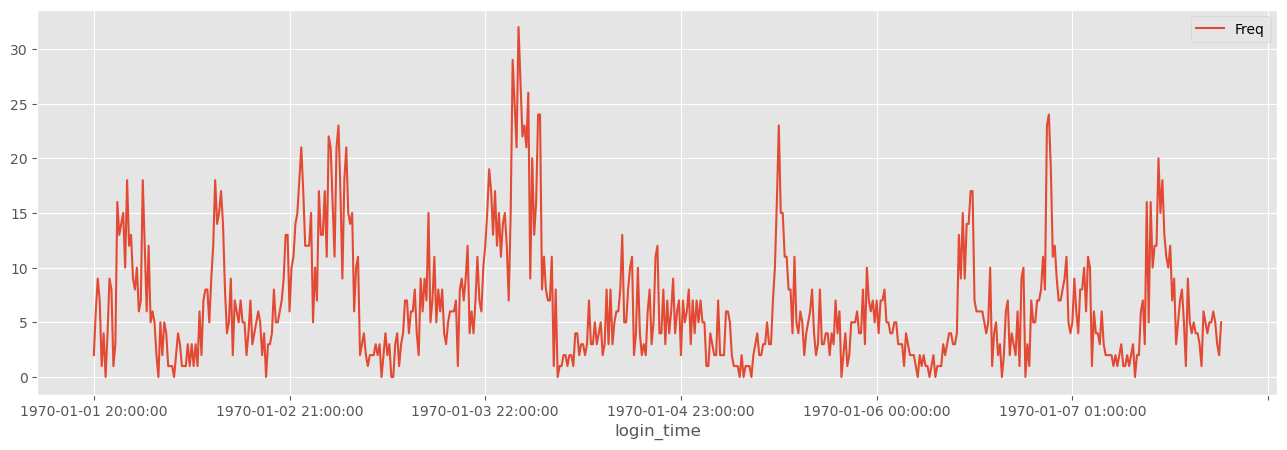

In [124]:
plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
l['1970-01-01 20:00:00':'1970-01-07 20:00:00'].plot(grid= True, figsize=(16,5))

In [125]:
l.describe()

,Freq
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


Text(0.5, 1.0, 'Logins for January')

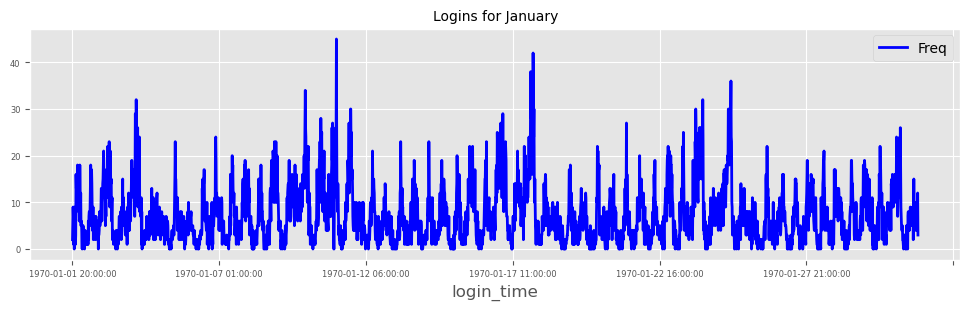

In [126]:
# 1 Month (January plot)
ax = l['1970-01-01 20:00:00':'1970-01-31 20:00:00'].plot(color='blue', figsize=(12, 3), linewidth=2, fontsize=6)
ax.set_title('Logins for January', fontsize= 10)

- Plot of the 3.5 month time series span with the range of 8.3 STD, around the 9.5 mean

Text(0.5, 1.0, 'Logins with 1 STD range')

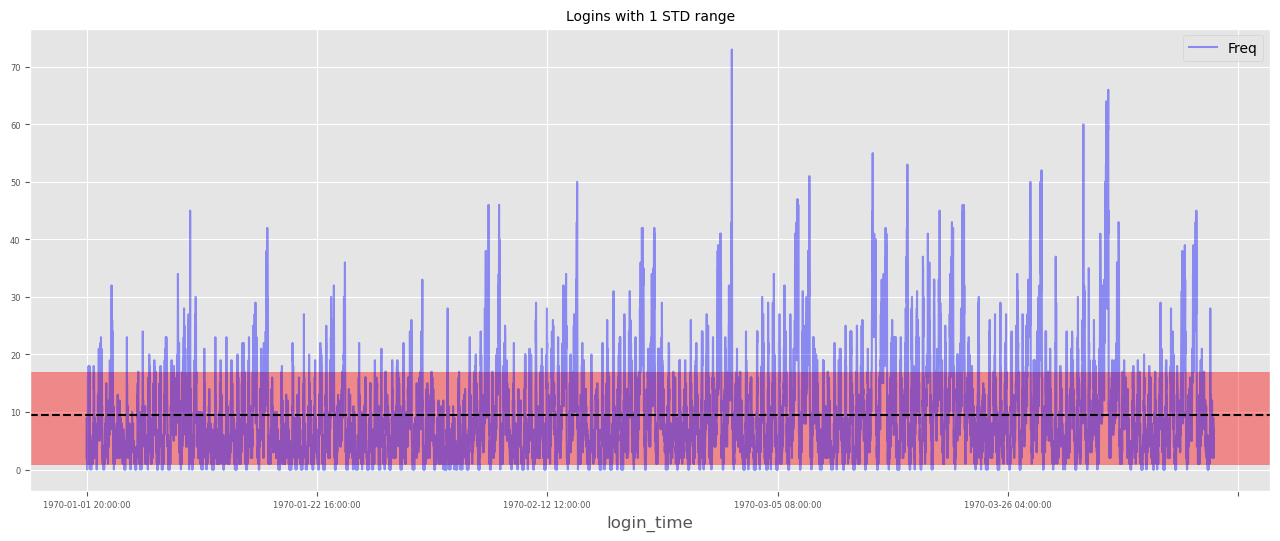

In [127]:
# Plot the time series 3.5 month span with the range of 8.3 std around the 9.5 mean
ax = l.plot(color='blue', fontsize=6, alpha=.4, figsize=(16,6))

# Add a horizontal red shaded region
ax.axhspan(1, 17, color='red', alpha= .4)
ax.axhline(9.5, color='black', linestyle='--')
ax.set_title('Logins with 1 STD range', fontsize= 10)

In [128]:
l.head()
l = l.fillna(method='bfill')
print(l.isnull().sum()) # no 0 vals 

Freq    0
dtype: int64


In [131]:
l.head(5)
# l.shape   #(9788, 5)
l.index = pd.to_datetime(l.index) # convert to datetime
# type(l.index)   #   pandas.core.indexes.datetimes.DatetimeIndex

In [132]:
# Lets see which days are the busiest
l['login_time'] = l.index
l['Day of Week'] = l['login_time'].dt.dayofweek


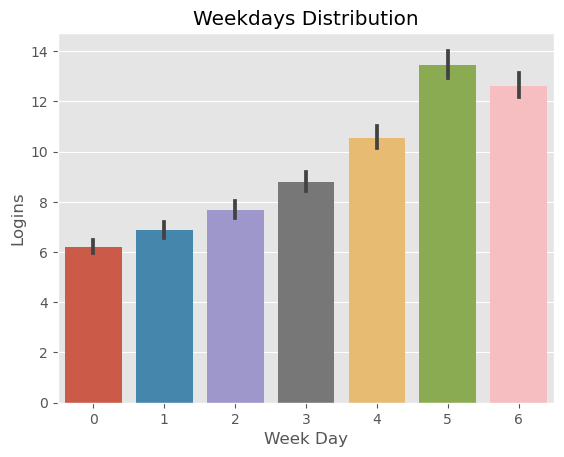

In [133]:
sns.barplot(x= 'Day of Week', y='Freq', data= l)
plt.xlabel('Week Day')
plt.title('Weekdays Distribution')
plt.ylabel('Logins')
plt.show()

- Saturdays and Sundays are most usage heavy, followed by Friday. There is observable gradual creschendo starting Monday and culminating Saturday. 